# Dataset overview

Dữ liệu chứa lịch sử 2 năm của các chiến dịch nhắn tin đa kênh(multichannel messaging campaigns) trong một công ty bán lẻ vừa và nhỏ.

Đa kênh(Multichannel) có nghĩa là công ty gửi tin nhắn qua nhiều kênh khác nhau: email, web push, mobile push, SMS.

Các chiến dịch(Campaigns) có thể là chiến dịch gửi hàng loạt(bulk), gửi theo sự kiện(trigger) hoặc giao dịch(transactional)

Mỗi tin nhắn chứa các thống kê chi tiết về việc giao tin(delivery), mở tin(open), nhấp chuột(click), mua hàng(purchase) và tất cả các sự kiện tiêu cực như hủy đăng ký(unsubscribe), khiếu nại spam(spam complaint) và trả lại tin(bounces).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ngày Lễ(Holidays)

Không chứa danh sách đầy đủ các ngày lễ(holidays) và sự kiện(events) liên quan đến các chiến dịch gửi hàng loạt(bulk campaigns). Hầu hết là các ngày lễ chính thức, nhưng một số sự kiện liên quan đến các đợt bán hàng:

* Black Friday (Ngày Thứ Sáu Đen)
* Cyber Monday Sale (Ngày Thứ Hai Mua Sắm Online)
* Back to School (Ngày Mua Sắm Trở Lại Trường)

Các nhà bán lẻ thường gửi các chiến dịch hàng loạt với các ưu đãi từ 1-3 ngày trước khi diễn ra ngày lễ. Vì vậy, bạn có thể phân tích cách thức gửi tin nhắn và doanh thu liên quan đến các ngày lễ này.

In [2]:
# Đọc dữ liệu từ tệp holidays.csv
holidays_df = pd.read_csv('dataset/holidays.csv')
holidays_df.head()  # Hiển thị 5 dòng đầu tiên của dataframe

,date,holiday
0,2021-01-01,New Year
1,2021-01-07,Orthodox Christmas
2,2021-01-13,Old New Year
3,2021-01-19,Baptizing - Sacred Epiphany
4,2021-01-25,Students day


In [3]:
holidays_df.info()  # Hiển thị thông tin về các cột trong dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     48 non-null     object
 1   holiday  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes


# Chiến Dịch(Campaigns)

Chiến dịch là các hoạt động nhắn tin đến một nhóm người nhận.

In [4]:
# Đọc dữ liệu từ tệp campaigns.csv
campaigns_df = pd.read_csv('dataset/campaigns.csv')

# Đổi kiểu dữ liệu của một số cột trong campaigns_df
campaigns_df['total_count']      = campaigns_df['total_count'].astype('Int64')
campaigns_df['subject_length']   = campaigns_df['subject_length'].astype('Int64')
campaigns_df['position']         = campaigns_df['position'].astype('Int64')
campaigns_df['hour_limit']       = campaigns_df['hour_limit'].astype('Int64')
campaigns_df['started_at']       = pd.to_datetime(campaigns_df['started_at'])  # Chuyển đổi cột started_at sang kiểu datetime
campaigns_df['finished_at']      = pd.to_datetime(campaigns_df['finished_at'])  # Chuyển đổi cột finished_at sang kiểu datetime
campaigns_df['ab_test']          = campaigns_df['ab_test'].astype('bool')  # Chuyển đổi cột ab_test thành kiểu boolean
campaigns_df['is_test']          = campaigns_df['is_test'].astype('bool')  # Chuyển đổi cột is_test thành kiểu boolean
campaigns_df['warmup_mode']      = campaigns_df['warmup_mode'].astype('bool')  # Chuyển đổi cột warmup_mode thành kiểu boolean

# Hiển thị thông tin về các cột trong campaigns_df
campaigns_df.head()

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503,True,False,<NA>,109,False,True,True,False,False,False,True,<NA>


In [5]:
list(campaigns_df.columns)  # Hiển thị danh sách các tên cột trong campaigns_df

['id',
 'campaign_type',
 'channel',
 'topic',
 'started_at',
 'finished_at',
 'total_count',
 'ab_test',
 'warmup_mode',
 'hour_limit',
 'subject_length',
 'subject_with_personalization',
 'subject_with_deadline',
 'subject_with_emoji',
 'subject_with_bonuses',
 'subject_with_discount',
 'subject_with_saleout',
 'is_test',
 'position']

## Kênh(Channels)

Kênh là một loại chiến dịch, bao gồm các kênh như:

- email
- mobile push
- web push
- SMS

Các đặc tính và chỉ số của chiến dịch phụ thuộc vào kênh sử dụng:

### Email

Email có tiêu đề, nội dung (thường là HTML với nhiều thông tin, ưu đãi và sự cá nhân hóa) và nhiều chỉ số như: nhấp chuột(click), khiếu nại spam(spam complaint), lỗi trả lại (hard bounce), hủy đăng ký(unsubscribe).

In [6]:
campaigns_df[campaigns_df.channel == 'email'].head(3)  # Lọc ra 3 dòng đầu tiên có channel là 'email'

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
7,129,bulk,email,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,3,True,False,<NA>,133,False,False,True,False,False,False,True,<NA>
8,136,bulk,email,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,177363,True,False,<NA>,133,False,False,True,False,False,False,True,<NA>
11,143,bulk,email,sale out,2021-05-20 08:00:16.293566,2021-05-20 08:57:18,283063,True,False,<NA>,112,False,False,True,False,False,False,True,<NA>


### Mobile push and web push

Cả hai kênh này đều có tiêu đề (first line of a message) và nội dung tùy chọn (some browsers display it, some browsers don't). Những kênh này không có một số sự kiện như khiếu nại spam, lỗi mềm (soft bounce) hay hủy đăng ký.

Có vẻ như nhà bán lẻ này không sử dụng web push.

### SMS

SMS không có tiêu đề, chỉ có nội dung (tin nhắn văn bản) và có ít sự kiện nhất: giao tin(deliver), nhấp (click), mua hàng(purchase), lỗi trả lại (hard bounce).

### Đa Kênh(Multichannel)

Đây là một loại chiến dịch giao dịch (transactional campaign) khi nhà bán lẻ cố gắng gửi thông tin quan trọng qua kênh rẻ nhất đến kênh đắt tiền hơn, tùy thuộc vào kênh mà người nhận sử dụng. Ví dụ, chuỗi chiến dịch có thể như sau:

1. Thử gửi email
2. Nếu không có email, gửi mobile push
3. Nếu không có mobile push, gửi web push
4. Nếu không có web push, gửi SMS

Danh sách các kênh được sử dụng bởi Nhà bán lẻ:

In [7]:
campaigns_df['channel'].value_counts(dropna=False)  # Đếm số lượng các giá trị khác nhau trong cột channel

channel
mobile_push     1396
email            483
multichannel      27
sms                1
Name: count, dtype: int64

## Các Loại Chiến Dịch(Campaign types)

Có 3 loại chiến dịch trong bộ dữ liệu:

1. Chiến Dịch Gửi Hàng Loạt (Bulk Campaign):

Các chiến dịch này thường được gửi đến nhiều phân khúc (danh sách người nhận) được nhóm lại theo một số điều kiện nhất định. Ví dụ: "khách truy cập chưa nhận bất kỳ chiến dịch gửi hàng loạt nào trong 3 tháng qua" hoặc các tiêu chí kinh doanh khác.

2. Chiến Dịch Kích Hoạt (Trigger Campaign):

Đây là những tin nhắn 1:1 được gửi dưới dạng phản ứng đối với hoạt động của người dùng. Ví dụ nổi bật nhất là abandoned cart (giỏ hàng bỏ quên): nếu người dùng thêm sản phẩm vào giỏ hàng nhưng không mua trong vòng 2 giờ sau sự kiện add to cart cuối cùng, chiến dịch kích hoạt abandoned cart sẽ cố gắng gửi tin nhắn qua các kênh mà người nhận đã đăng ký.

3. Chiến Dịch Giao Dịch (Transactional Campaign):

Đây là những tin nhắn mang tính thông tin như mật khẩu một lần `one-time password`, xác nhận email`email confirmation`, thưởng đã được thêm vào tài khoản của bạn`bonuses added to your account`, v.v. Các chiến dịch này có thể là đa kênh (multichannel) hoặc thuộc bất kỳ kênh nào như email, web push, v.v.

Sự khác biệt giữa chiến dịch Bulk và hai loại chiến dịch còn lại:

1. Chiến dịch gửi hàng loạt (Bulk campaign) có thể chỉ được gửi một lần.
2. Chiến dịch kích hoạt (Triggers) và chiến dịch giao dịch (Transactionals) có thể hoạt động mãi mãi.

Vì vậy, bộ dữ liệu có rất nhiều chiến dịch gửi hàng loạt và ít chiến dịch loại khác.

In [8]:
campaigns_df['campaign_type'].value_counts(dropna=False)  # Đếm số lượng các giá trị khác nhau trong cột campaign_type

campaign_type
bulk             1830
transactional      50
trigger            27
Name: count, dtype: int64

## Subject, topic and pre-header 

Tiêu Đề (Subject) là tiêu đề của một tin nhắn.

- Trong email, đây là dòng chữ in đậm trong hộp thư đến của bạn.
- Trong các chiến dịch push(push campaigns), đây là dòng văn bản chính trong thông báo đẩy(push notification).
- SMS không có tiêu đề.

Pre-header là văn bản xem trước trong hộp thư đến của bạn. Thường thì nó không nổi bật và chỉ hiển thị một phần nội dung tin nhắn. Pre-header chỉ hoạt động đối với email.

Example:

![Subject and pre-header](https://storage.yandexcloud.net/r46-data/pictures-for-datasets/subject.png)

Chủ Đề (Topic) của Chiến Dịch Gửi Hàng Loạt:

In [9]:
campaigns_df['topic'].value_counts(dropna=False)  # Đếm số lượng các giá trị khác nhau trong cột topic

topic
sale out                      779
happy birthday                332
offer after purchase          316
leave review                  287
event                          63
NaN                            30
welcome campaign               27
order ready for pickup         10
order shipped                  10
order created                  10
order reminder                  9
abandoned cart                  6
order pickup still pending      4
abandoned view                  3
abandoned search                2
added to wish list              2
abandoned category              2
subscribed                      2
order cancelled                 2
price drop                      2
removed from wish list          1
back in stock                   1
double opt in                   1
user added to segment           1
recent purchase                 1
bonuses expired                 1
welcome letter                  1
profile updated                 1
wish list status                1
Name: co

## Subject characteristics

Do yêu cầu về bảo mật và ẩn danh dữ liệu, chúng tôi không thể cung cấp tiêu đề thực tế của các chiến dịch. Thay vào đó, chúng tôi đã chuẩn bị một số đặc điểm của tiêu đề chiến dịch:

In [10]:
# Lọc các cột liên quan đến đặc điểm của email
campaigns_df[ ['topic', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout' ] ].head()

,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,sale out,146,False,False,True,False,False,False
1,sale out,97,False,False,True,False,False,False
2,sale out,146,False,False,True,False,False,False
3,sale out,97,False,False,True,False,False,False
4,NaN,109,False,True,True,False,False,False


In [11]:
list(campaigns_df.columns)

['id',
 'campaign_type',
 'channel',
 'topic',
 'started_at',
 'finished_at',
 'total_count',
 'ab_test',
 'warmup_mode',
 'hour_limit',
 'subject_length',
 'subject_with_personalization',
 'subject_with_deadline',
 'subject_with_emoji',
 'subject_with_bonuses',
 'subject_with_discount',
 'subject_with_saleout',
 'is_test',
 'position']

Các Đặc Tính của Tiêu Đề:

* `subject_length` - Độ dài của tiêu đề tính bằng ký tự (đôi khi tỷ lệ mở có thể phụ thuộc vào độ dài của tiêu đề).
* `subject_with_personalization` - Tiêu đề có sự cá nhân hóa. Example: "Hello, **John Wick**, there is the special delivery for you!"
* `subject_with_deadline` - Tiêu đề có thông tin về thời hạn. Example: "Hey, John Wick! Only **4 days left** when you can get your special delivery!"
* `subject_with_emoji` - Tiêu đề có biểu tượng cảm xúc. Example: "Hello, John Wick, there is the special delivery for you 😵🍺"
* `subject_with_bonuses` - Tiêu đề có biểu tượng cảm xúc. Example: "Hey, John Wick! We added **300 gold** coins to your bonus account!"
* `subject_with_discount` - Tiêu đề có thông tin về giảm giá. Example: "Hey, John Wick! **40% discount** in Continental for a low season!"
* `subject_with_saleout` - Tiêu đề thông báo một đợt giảm giá. Example: "Hey, John Wick! **Black Friday** is coming!"

Bạn có thể phân tích cách các đặc tính này liên quan đến tỷ lệ chuyển đổi cuối cùng hoặc các chỉ số khác.

## Dates and other bulk characteristics

Chỉ có chiến dịch gửi hàng loạt (bulk campaigns) mới có ngày bắt đầu(start date) và ngày kết thúc(finish date).

Ngày bắt đầu (Start date) là ngày/giờ (theo múi giờ địa phương) khi chiến dịch được triển khai bởi chuyên gia marketing.

Ngày kết thúc (Finish date) là ngày/giờ khi chiến dịch gửi tin nhắn cuối cùng.

Thường thì, việc gửi các chiến dịch có quy mô nhỏ đến lớn mất từ 30 phút đến 4 giờ. Tuy nhiên, một số chiến dịch (chiến dịch khởi động warmup campaigns) có thể kéo dài vài ngày hoặc vài tuần. Điều này thường xảy ra khi nhà bán lẻ có cơ sở dữ liệu người nhận mới và không muốn bị các nhà cung cấp dịch vụ email chặn vì tỷ lệ hard bounce hoặc khiếu nại spam cao (xem phần Messages).

Trong trường hợp này, chiến dịch sẽ có `warmup_mode=True` và giá trị `hour_limit` để chỉ định số lượng tin nhắn có thể gửi mỗi giờ.

- Giá trị thông thường của hour_limit là `500` hoặc `1000`. Nhưng đôi khi, khi `mailing domain` đã được "khởi động" (tức là đã có được sự tin tưởng từ các nhà cung cấp dịch vụ email), giới hạn này có thể được tăng lên thành các giá trị lớn để hoàn thành chiến dịch nhanh hơn.

- `total_recipients` chỉ số này cho biết tổng số người nhận trong chiến dịch gửi hàng loạt khi chiến dịch được triển khai. Chiến dịch kích hoạt (trigger) và chiến dịch giao dịch (transactional) không có giá trị này.

In [12]:
# Đổi kiểu dữ liệu của cột hour_limit
campaigns_df['hour_limit'] = campaigns_df['hour_limit'].astype('Int64')

# Lọc các chiến dịch có hour_limit lớn hơn 0
campaigns_df[ campaigns_df['hour_limit'] > 0 ]\
    [ ['started_at', 'finished_at', 'total_count', 'warmup_mode', 'hour_limit'] ].head()

,started_at,finished_at,total_count,warmup_mode,hour_limit
58,2021-06-29 14:00:13.752337,2021-06-29 17:02:36,613004,True,200000
257,2021-11-24 07:03:20.136238,2021-11-24 14:31:56,5327892,True,1000000
278,2021-12-03 06:04:29.576983,2021-12-03 09:44:29,35981,True,10000
297,2021-12-13 06:41:39.498379,2021-12-13 10:57:06,28759,True,10000
692,2022-06-07 11:12:59.694535,2022-06-09 07:36:13,91225,True,4000


## Other service info

* `is_test` - Chỉ ra rằng đây là chiến dịch thử nghiệm gửi đến một nhóm đối tượng giới hạn. Bạn có thể bỏ qua những chiến dịch này trong nghiên cứu của mình.
* `position` - Vị trí của các chiến dịch kích hoạt (chỉ áp dụng cho chiến dịch trigger). Vì các sự kiện khác nhau có thể kích hoạt các chiến dịch kích hoạt khác nhau, việc kiểm soát số lượng tin nhắn gửi đi là rất quan trọng để tránh tình trạng gửi tin nhắn không kiểm soát (người nhận có thể đánh dấu chiến dịch là spam hoặc hủy đăng ký với nhà bán lẻ). Do đó, có một thứ tự quan trọng từ các chiến dịch kích hoạt quan trọng nhất (vị trí nhỏ hơn là quan trọng hơn) đến các chiến dịch ít quan trọng hơn (vị trí số lớn hơn).

- Nếu chiến dịch kích hoạt có vị trí nhỏ hơn có thể được gửi, tất cả các chiến dịch kích hoạt khác sẽ bị bỏ qua.
- Nếu không thể gửi chiến dịch có vị trí nhỏ hơn, hệ thống sẽ kiểm tra chiến dịch kích hoạt tiếp theo.
- Nếu tất cả các chiến dịch kích hoạt đã được kiểm tra mà không thỏa mãn điều kiện, tin nhắn kích hoạt sẽ không được gửi.

In [13]:
# Lọc ra các chiến dịch trigger
triggers_df = campaigns_df[ campaigns_df['campaign_type'] == 'trigger' ]

# Loại bỏ các chiến dịch là test
triggers_df = triggers_df[ ~triggers_df['is_test'] == True ]

# Sắp xếp các chiến dịch trigger theo cột position
triggers_df[['topic', 'position']].sort_values(by='position', ascending=True)

,topic,position
1830,abandoned cart,0
1838,subscribed,0
1845,subscribed,0
1843,double opt in,1
1846,abandoned view,2
1856,abandoned view,2
1852,abandoned category,3
1837,abandoned cart,4
1839,abandoned cart,4
1847,abandoned cart,4


# Messages

Mỗi dòng tin nhắn đại diện cho một tin nhắn cá nhân được gửi đến một người nhận duy nhất. Nó chứa các thông tin về loại tin nhắn, kênh gửi tin, người nhận và một số chỉ số (metrics) được mô tả dưới đây.


In [14]:
# Đọc dữ liệu từ tệp messages-demo.csv
messages_df = pd.read_csv('dataset/messages-demo.csv', index_col='message_id')

C:\Users\miynzi\AppData\Local\Temp\ipykernel_20384\2053711967.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv('dataset/messages-demo.csv', index_col='message_id')


In [15]:
# Hiển thị danh sách các cột trong messages_df
list(messages_df.columns)

['id',
 'campaign_id',
 'message_type',
 'client_id',
 'channel',
 'category',
 'platform',
 'email_provider',
 'stream',
 'date',
 'sent_at',
 'is_opened',
 'opened_first_time_at',
 'opened_last_time_at',
 'is_clicked',
 'clicked_first_time_at',
 'clicked_last_time_at',
 'is_unsubscribed',
 'unsubscribed_at',
 'is_hard_bounced',
 'hard_bounced_at',
 'is_soft_bounced',
 'soft_bounced_at',
 'is_complained',
 'complained_at',
 'is_blocked',
 'blocked_at',
 'is_purchased',
 'purchased_at',
 'created_at',
 'updated_at']

In [16]:
# Xóa các cột không cần thiết trong messages_df
messages_df.drop(labels=['id', 'created_at', 'updated_at', 'category'], inplace=True, axis=1)

In [17]:
# Đổi kiểu dữ liệu cho các cột trong messages_df
messages_df['campaign_id'] = messages_df['campaign_id'].astype('Int64')
messages_df['client_id'] = messages_df['client_id'].astype('Int64')

# Chuyển đổi các giá trị trong các cột boolean thành kiểu True/False
def convert_to_bool(value):
    if value == 't':
        return True
    else:
        return False

# Áp dụng hàm convert_to_bool cho các cột trong messages_df
messages_df['is_opened']       = messages_df['is_opened'].apply(convert_to_bool)
messages_df['is_clicked']      = messages_df['is_clicked'].apply(convert_to_bool)
messages_df['is_unsubscribed'] = messages_df['is_unsubscribed'].apply(convert_to_bool)
messages_df['is_hard_bounced'] = messages_df['is_hard_bounced'].apply(convert_to_bool)
messages_df['is_soft_bounced'] = messages_df['is_soft_bounced'].apply(convert_to_bool)
messages_df['is_complained']   = messages_df['is_complained'].apply(convert_to_bool)
messages_df['is_blocked']      = messages_df['is_blocked'].apply(convert_to_bool)
messages_df['is_purchased']    = messages_df['is_purchased'].apply(convert_to_bool)

# Chuyển đổi các cột thời gian thành kiểu datetime
messages_df['date']                  = pd.to_datetime(messages_df['date'])
messages_df['sent_at']               = pd.to_datetime(messages_df['sent_at'])
messages_df['opened_first_time_at']  = pd.to_datetime(messages_df['opened_first_time_at'])
messages_df['opened_last_time_at']   = pd.to_datetime(messages_df['opened_last_time_at'])
messages_df['clicked_first_time_at'] = pd.to_datetime(messages_df['clicked_first_time_at'])
messages_df['clicked_last_time_at']  = pd.to_datetime(messages_df['clicked_last_time_at'])
messages_df['unsubscribed_at']       = pd.to_datetime(messages_df['unsubscribed_at'])
messages_df['hard_bounced_at']       = pd.to_datetime(messages_df['hard_bounced_at'])
messages_df['soft_bounced_at']       = pd.to_datetime(messages_df['soft_bounced_at'])
messages_df['complained_at']         = pd.to_datetime(messages_df['complained_at'])
messages_df['blocked_at']            = pd.to_datetime(messages_df['blocked_at'])
messages_df['purchased_at']          = pd.to_datetime(messages_df['purchased_at'])

### Columns description

Các cột trong bảng dữ liệu được nhóm theo ý nghĩa:

* Thông Tin Chiến Dịch:
 * `campaign_id` - Mã nhận dạng chiến dịch từ bảng `campaigns`.
 * `message_type` - loại tin nhắn (gửi hàng loạt, kích hoạt, giao dịch).
 * `channel` - Kênh gửi tin nhắn. Lưu ý: không có loại tin nhắn `multichannel` như trong bảng `campaigns`, vì chiến dịch có thể đa kênh (gửi tin nhắn qua nhiều kênh khác nhau), nhưng tin nhắn thuộc về một kênh duy nhất.

 
* Thông Tin Người Nhận:
 * `client_id` -  Mã người nhận trong cơ sở dữ liệu REES46 (duy nhất cho mỗi người dùng).
 * `email_provider` - Phần tên miền của email (đối với các tin nhắn email) như `gmail.com` or `hotmail.com`. Có thể là NA: dữ liệu đã bị xóa đối với các tên miền cá nhân hoặc công ty với số lượng tin nhắn ít, nhằm tránh nhận dạng cá nhân.
 
* Thông Tin Thiết Bị:
 * `platform` - Loại nền tảng mà tin nhắn đã được mở (nếu có). Điều này được xác định tự động theo `user-agent` hoặc thông tin dịch vụ khác. Ví dụ `smartphone`, `tablet`, `phablet`.
 * `stream` - Giá trị chuỗi của loại thiết bị (desktop, ios, android, v.v.) nơi tin nhắn đã được mở (nếu có). Điều này được xác định bởi nhà phát triển ứng dụng phía nhà bán lẻ khi họ tích hợp SDK.
 
* Hành Vi:
 * `date` - Ngày theo định dạng YYYY-MM-DD khi tin nhắn được gửi. Đây là phần của thuộc tính thời gian `sent_at` giúp nhóm các tin nhắn theo ngày.
 * `sent_at` - Thời gian gửi tin nhắn..
 * `is_opened` - Cờ boolean cho biết tin nhắn đã được người nhận mở chưa.
 * `opened_first_time_at` - Thời gian lần đầu tiên tin nhắn được mở.
 * `opened_last_time_at` - Thời gian lần cuối cùng tin nhắn được mở (có thể giống với `opened_first_time_at`, nếu tin nhắn chỉ được mở một lần).
 * `is_clicked` - Cờ boolean cho biết tin nhắn đã được người nhận nhấp vào chưa.
 * `clicked_first_time_at` - Thời gian lần đầu tiên tin nhắn được nhấp vào.
 * `clicked_last_time_at` - Thời gian lần cuối cùng tin nhắn được nhấp vào (có thể giống với `clicked_first_time_at`, nếu tin nhắn chỉ được nhấp một lần).
 * `is_unsubscribed` - Cờ boolean cho biết người nhận đã nhấp vào liên kết `unsubscribe` trong tin nhắn chưa.
 * `unsubscribed_at` - Thời gian khi người nhận nhấp vào liên kết `unsubscribe` trong tin nhắn.
 * `is_hard_bounced` - Cờ boolean cho biết tin nhắn bị "hard bounce" (sự cố vĩnh viễn trong việc gửi tin nhắn nếu địa chỉ của người nhận không tồn tại, như email không tồn tại hoặc mã thông báo push mobile không hợp lệ).
 * `hard_bounced_at` -  Thời gian khi tin nhắn bị hard bounce.
 * `is_soft_bounced` - Cờ boolean cho biết tin nhắn bị "soft bounce" (sự cố tạm thời trong việc gửi tin nhắn nếu hộp thư của người nhận không thể nhận tin nhắn trong thời gian ngắn, ví dụ: hộp thư đầy nhưng vẫn có thể nhận tin trong tương lai).
 * `soft_bounced_at` - Thời gian khi tin nhắn bị soft bounce.
 * `is_complained` - Cờ boolean cho biết người nhận đã nhấp vào nút `SPAM` trong ứng dụng email chưa.
 * `complained_at` - Thời gian khi người nhận nhấp vào nút `SPAM` trong ứng dụng email.
 * `is_blocked` - Cờ boolean cho biết nỗ lực gửi tin nhắn bị tạm thời chặn bởi nhà cung cấp dịch vụ email (như postmaster thông báo "you act like spammer, I won't deliver your email). Đây không phải là lệnh cấm vĩnh viễn.
 * `blocked_at` - Thời gian khi nỗ lực gửi tin nhắn bị tạm thời chặn bởi nhà cung cấp dịch vụ email.
 * `is_purchased` - Cờ boolean cho biết người nhận đã nhấp vào bất kỳ liên kết nào trong tin nhắn, mở website hoặc ứng dụng di động và thực hiện mua hàng.
 * `purchased_at` - Thời gian khi người nhận thực hiện mua hàng sau khi nhấp vào liên kết trong email hoặc tin nhắn khác.


## Messages overview

Lưu ý: Dataframe này chỉ chứa một số lượng hạn chế tin nhắn (chỉ có 10 triệu tin nhắn từ tổng số 721 triệu tin nhắn). Bạn có thể tìm thấy liên kết đến file CSV đầy đủ trên [dataset description page](https://www.kaggle.com/datasets/mkechinov/direct-messaging).

In [18]:
# Lọc dữ liệu theo loại chiến dịch (bulk, trigger, transactional)
bulk_df          = messages_df[ messages_df['message_type'] == 'bulk' ]
trigger_df       = messages_df[ messages_df['message_type'] == 'trigger' ]
transactional_df = messages_df[ messages_df['message_type'] == 'transactional' ]

### Bulk messages

Tính toán số lượng tin nhắn theo kênh. DataFrame hạn chế này chỉ có thông tin về `email` và `mobile_push`:

In [19]:
# Đếm số lượng các chiến dịch theo channel
bulk_df['channel'].value_counts()

channel
mobile_push    4228385
email          2834010
Name: count, dtype: int64

#### Experiment 1: Nghiên cứu tỷ lệ chuyển đổi của chiến dịch email gửi hàng loạt

Hãy thử tính toán tỷ lệ chuyển đổi của từng chiến dịch email.

In [20]:
# Lọc các chiến dịch email trong danh sách bulk
bulk_email_df = bulk_df[bulk_df['channel'] == 'email']

# Hiển thị số lượng các bản ghi của chiến dịch email
bulk_email_df.count()

campaign_id              2834010
message_type             2834010
client_id                2834010
channel                  2834010
platform                  418885
email_provider           2834010
stream                   2834010
date                     2834010
sent_at                  2834010
is_opened                2834010
opened_first_time_at      489189
opened_last_time_at       489189
is_clicked               2834010
clicked_first_time_at      81042
clicked_last_time_at       81042
is_unsubscribed          2834010
unsubscribed_at             9622
is_hard_bounced          2834010
hard_bounced_at              225
is_soft_bounced          2834010
soft_bounced_at              951
is_complained            2834010
complained_at               2100
is_blocked               2834010
blocked_at                    44
is_purchased             2834010
purchased_at                2496
dtype: int64

In [21]:
# Tính tổng số lượng gửi và số lượng mua
email_campaigns = pd.pivot_table(bulk_email_df, index='campaign_id', values='is_purchased', aggfunc=['count', 'sum'] )
email_campaigns.columns = ['sent', 'purchased']
email_campaigns.head()

,sent,purchased
campaign_id,,
129,3,0
136,177363,38
143,283063,89
150,781357,1220
152,274633,178


In [22]:
# Tính tỷ lệ chuyển đổi (conversion rate)
email_campaigns['conversion'] = (email_campaigns['purchased'] / email_campaigns['sent'] * 100)
email_campaigns.sort_values('conversion', ascending=False).head()

,sent,purchased,conversion
campaign_id,,,
361,59475,480,0.807062
289,60332,194,0.321554
196,6373,10,0.156912
150,781357,1220,0.156139
337,6582,7,0.106351


In [23]:
# Thêm thông tin chiến dịch vào bảng email_campaigns
email_campaigns_data = campaigns_df.loc[ (campaigns_df['channel'] == 'email') & (campaigns_df['campaign_type'] == 'bulk') ]
email_campaigns_data.drop(labels=['campaign_type', 'channel', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'is_test', 'position'], inplace=True, axis=1)

email_campaigns_data = email_campaigns_data.set_index(email_campaigns_data['id'])
email_campaigns_data.drop(labels=['id'], inplace=True, axis=1)

email_campaigns = email_campaigns.merge(email_campaigns_data, how='left', left_index=True, right_index=True)
email_campaigns.head()

C:\Users\miynzi\AppData\Local\Temp\ipykernel_20384\1772651656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_campaigns_data.drop(labels=['campaign_type', 'channel', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'is_test', 'position'], inplace=True, axis=1)


,sent,purchased,conversion,topic,started_at,finished_at,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
campaign_id,,,,,,,,,,,,,
129,3,0,0.000000,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,133,False,False,True,False,False,False
136,177363,38,0.021425,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,133,False,False,True,False,False,False
143,283063,89,0.031442,sale out,2021-05-20 08:00:16.293566,2021-05-20 08:57:18,112,False,False,True,False,False,False
150,781357,1220,0.156139,sale out,2021-05-21 07:00:11.471804,2021-05-21 09:39:41,133,False,False,True,False,False,False
152,274633,178,0.064814,sale out,2021-05-24 07:48:42.153896,2021-05-24 08:43:38,109,False,False,True,False,False,False


Hãy kiểm tra chủ đề tiêu đề nào ảnh hưởng đến tỷ lệ chuyển đổi:

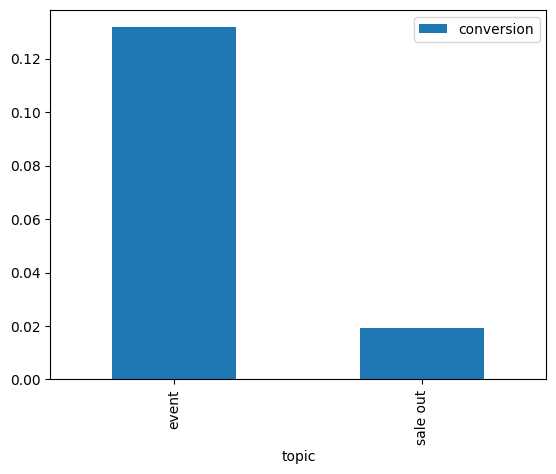

In [24]:
# Vẽ biểu đồ tỷ lệ chuyển đổi theo chủ đề chiến dịch
email_campaigns[['topic', 'conversion']].pivot_table(index='topic', values='conversion', aggfunc='median').plot(kind='bar')
plt.show()

Hãy kiểm tra cách mà việc cá nhân hóa ảnh hưởng đến tỷ lệ chuyển đổi:

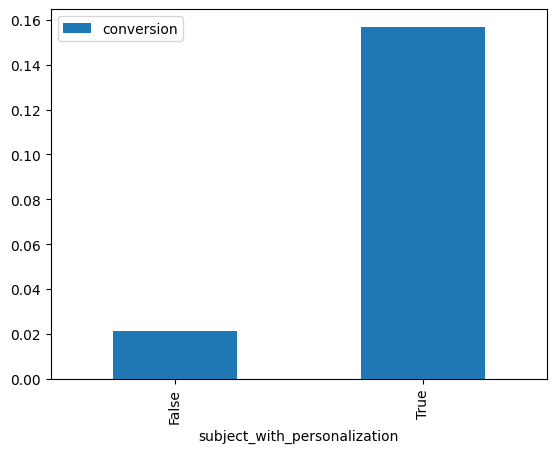

In [25]:
# Vẽ biểu đồ tỷ lệ chuyển đổi theo việc sử dụng tên cá nhân hóa trong chủ đề
email_campaigns[['subject_with_personalization', 'conversion']].pivot_table(index='subject_with_personalization', values='conversion', aggfunc='median').plot(kind='bar')
plt.show()

#### Experiment 2: #### Thí nghiệm 2: Nghiên cứu tỷ lệ mở (Open Rate)

Tỷ lệ mở (open rate) giống như tỷ lệ chuyển đổi, nhưng đo lường số lượng người dùng mở email khi họ đọc tiêu đề và phần preview (pre-header) của tin nhắn.

In [26]:
# Tính tỷ lệ mở email (Open Rate) thay vì tỷ lệ mua (Conversion)
email_campaigns = pd.pivot_table(bulk_email_df, index='campaign_id', values='is_opened', aggfunc=['count', 'sum'] )
email_campaigns.columns = ['sent', 'opened']
email_campaigns.head()

,sent,opened
campaign_id,,
129,3,3
136,177363,24041
143,283063,42161
150,781357,213141
152,274633,40818


In [27]:
# Tính tỷ lệ mở (open rate) theo phần trăm
email_campaigns['conversion'] = (email_campaigns['opened'] / email_campaigns['sent'] * 100)
email_campaigns.sort_values('conversion', ascending=False).head()

# Thêm thông tin chiến dịch vào bảng email_campaigns
email_campaigns = email_campaigns.merge(email_campaigns_data, how='left', left_index=True, right_index=True)
email_campaigns.head()

,sent,opened,conversion,topic,started_at,finished_at,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
campaign_id,,,,,,,,,,,,,
129,3,3,100.000000,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,133,False,False,True,False,False,False
136,177363,24041,13.554687,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,133,False,False,True,False,False,False
143,283063,42161,14.894564,sale out,2021-05-20 08:00:16.293566,2021-05-20 08:57:18,112,False,False,True,False,False,False
150,781357,213141,27.278312,sale out,2021-05-21 07:00:11.471804,2021-05-21 09:39:41,133,False,False,True,False,False,False
152,274633,40818,14.862744,sale out,2021-05-24 07:48:42.153896,2021-05-24 08:43:38,109,False,False,True,False,False,False


Hãy kiểm tra chủ đề tiêu đề nào ảnh hưởng đến tỷ lệ mở (OR%):

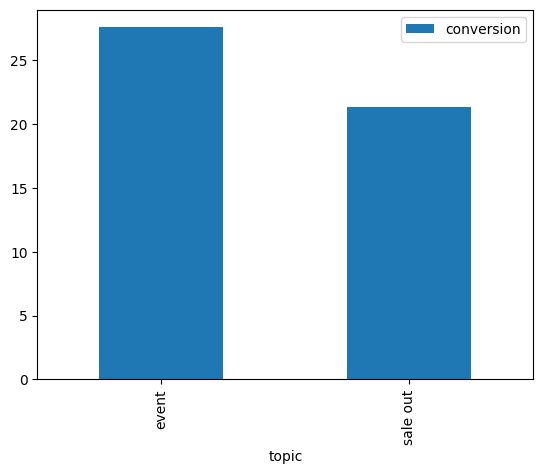

In [28]:
# Vẽ biểu đồ tỷ lệ mở email theo chủ đề chiến dịch
email_campaigns[['topic', 'conversion']].pivot_table(index='topic', values='conversion', aggfunc='median').plot(kind='bar')
plt.show()

Hãy kiểm tra cách mà việc cá nhân hóa ảnh hưởng đến tỷ lệ chuyển đổi:

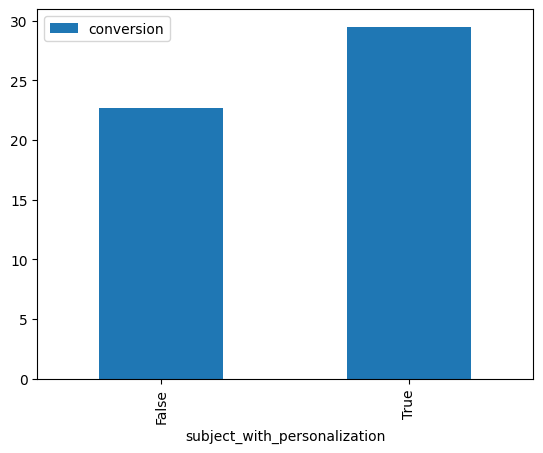

In [29]:
# Vẽ biểu đồ tỷ lệ mở email theo việc sử dụng tên cá nhân hóa trong chủ đề
email_campaigns[['subject_with_personalization', 'conversion']].pivot_table(index='subject_with_personalization', values='conversion', aggfunc='median').plot(kind='bar')
plt.show()

Và kiểm tra cách mà emoji ảnh hưởng đến tỷ lệ mở (OR%):

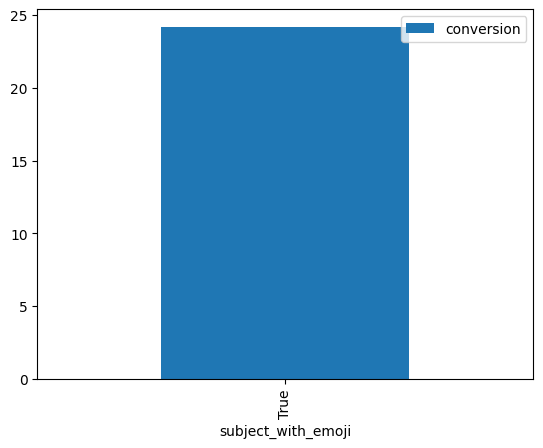

In [30]:
# Vẽ biểu đồ tỷ lệ mở email theo việc sử dụng emoji trong chủ đề
email_campaigns[['subject_with_emoji', 'conversion']].pivot_table(index='subject_with_emoji', values='conversion', aggfunc='median').plot(kind='bar')
plt.show()

Hmmm... có vẻ như họ gửi chiến dịch có emoji 🤪.

# Client First Purchase Date

In [32]:
# Đọc dữ liệu từ file CSV
client_first_purchase_df = pd.read_csv('dataset/client_first_purchase_date.csv')

# Hiển thị 5 dòng đầu tiên
client_first_purchase_df.head()

,client_id,first_purchase_date
0,1515915625761548908,2022-03-04
1,1515915625638660959,2022-04-06
2,1515915625490249330,2022-03-03
3,1515915625728802311,2021-12-20
4,1515915625915446913,2023-01-16


In [33]:
# Hiển thị thông tin về các cột trong DataFrame
client_first_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854736 entries, 0 to 1854735
Data columns (total 2 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   client_id            int64 
 1   first_purchase_date  object
dtypes: int64(1), object(1)
memory usage: 28.3+ MB


In [34]:
# Kiểm tra các giá trị thống kê mô tả
client_first_purchase_df.describe()

,client_id
count,1.854736e+06
mean,1.515916e+18
std,1.939981e+08
min,1.515916e+18
25%,1.515916e+18
50%,1.515916e+18
75%,1.515916e+18
max,1.515916e+18


In [36]:
# Kiểm tra số lượng khách hàng duy nhất
num_unique_clients = client_first_purchase_df['client_id'].nunique()
num_unique_clients

1854736

In [39]:
# Kiểm tra số lượng khách hàng duy nhất
num_unique_clients = client_first_purchase_df['client_id'].nunique()

# Kiểm tra ngày mua hàng đầu tiên gần nhất và sớm nhất
earliest_purchase_date = client_first_purchase_df['first_purchase_date'].min()
latest_purchase_date = client_first_purchase_df['first_purchase_date'].max()

# Số lượng khách hàng
num_clients = client_first_purchase_df.shape[0]

print(f"Số lượng khách hàng duy nhất: {num_unique_clients}")
print(f"Ngày mua hàng đầu tiên sớm nhất: {earliest_purchase_date}")
print(f"Ngày mua hàng đầu tiên gần nhất: {latest_purchase_date}")
print(f"Tổng số khách hàng: {num_clients}")

Số lượng khách hàng duy nhất: 1854736
Ngày mua hàng đầu tiên sớm nhất: 2021-12-15
Ngày mua hàng đầu tiên gần nhất: 2023-12-14
Tổng số khách hàng: 1854736


In [40]:
# Chuyển đổi cột `first_purchase_date` thành kiểu datetime
client_first_purchase_df['first_purchase_date'] = pd.to_datetime(client_first_purchase_df['first_purchase_date'])

In [41]:
# Tính số ngày từ lần mua đầu tiên đến ngày hiện tại
client_first_purchase_df['days_since_first_purchase'] = (pd.to_datetime('today') - client_first_purchase_df['first_purchase_date']).dt.days

# Phân nhóm theo năm và tháng
client_first_purchase_df['purchase_year'] = client_first_purchase_df['first_purchase_date'].dt.year
client_first_purchase_df['purchase_month'] = client_first_purchase_df['first_purchase_date'].dt.month

# Thống kê theo năm và tháng
purchase_by_year_month = client_first_purchase_df.groupby(['purchase_year', 'purchase_month']).size()

print(purchase_by_year_month)

purchase_year  purchase_month
2021           12                 62058
2022           1                  53422
               2                  55112
               3                  87185
               4                  80263
               5                  61869
               6                  73230
               7                  56902
               8                  61472
               9                  52620
               10                 50560
               11                 91824
               12                 76346
2023           1                  38285
               2                  31738
               3                  67233
               4                  75621
               5                 122142
               6                 130585
               7                 106369
               8                 124780
               9                  78703
               10                 88118
               11                 92270
          

In [42]:
# Lọc các khách hàng có ngày mua hàng trong năm 2022
purchase_2022 = client_first_purchase_df[client_first_purchase_df['purchase_year'] == 2022]

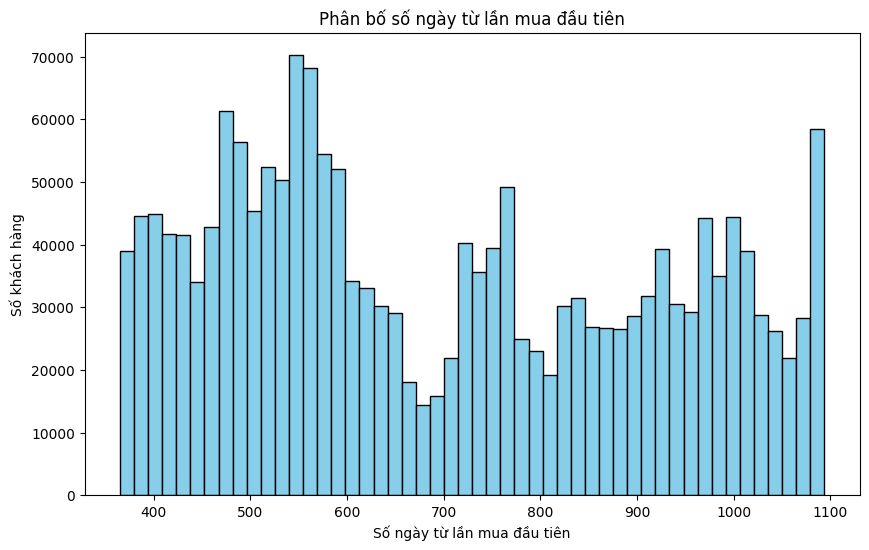

In [43]:
# Vẽ histogram để xem phân bố của ngày mua hàng
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(client_first_purchase_df['days_since_first_purchase'], bins=50, color='skyblue', edgecolor='black')
plt.title('Phân bố số ngày từ lần mua đầu tiên')
plt.xlabel('Số ngày từ lần mua đầu tiên')
plt.ylabel('Số khách hàng')
plt.show()